In [1]:
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt
# from EIANN._network import build_EIANN_from_config

from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=1000)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Simple vanilla FF BP 
- (should be 0 angle vs BP)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_vanBP.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'


<Figure size 1000x300 with 0 Axes>

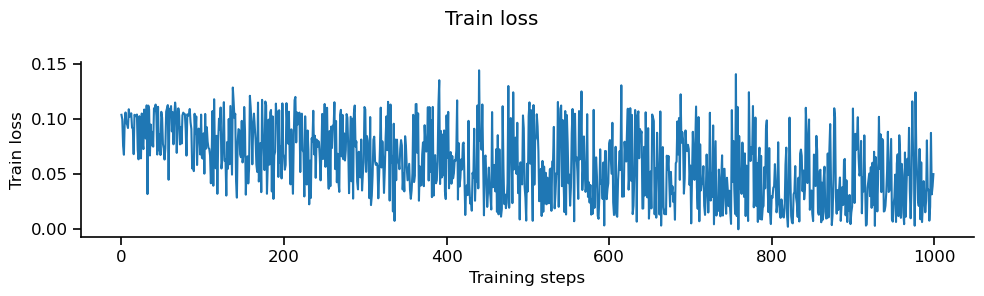

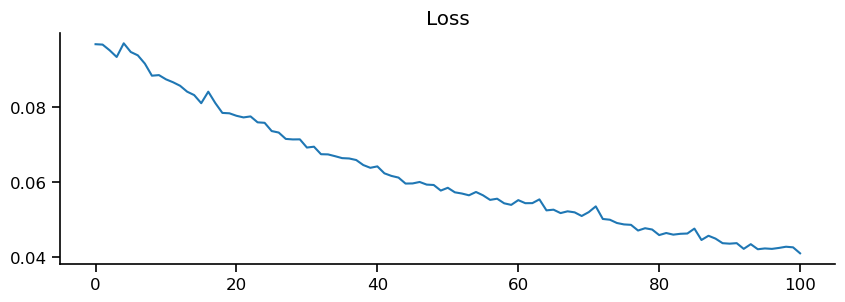

Batch accuracy = 80.30000305175781%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:641: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


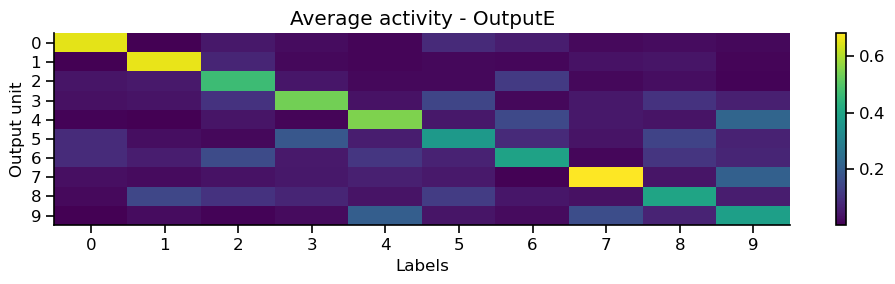

In [7]:
# Build network
network_name = "EIANN_1_hidden_mnist_vanBP"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bp = ut.build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
bp.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
bp.save(path=saved_network_path)

bp.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(bp)
plt.show()

plt.figure()
plt.plot(bp.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(bp, test_dataloader)

  0%|          | 0/100 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_vanBP_bpClone.pkl


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1399: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arccos(torch.round(vector_product,decimals=5))


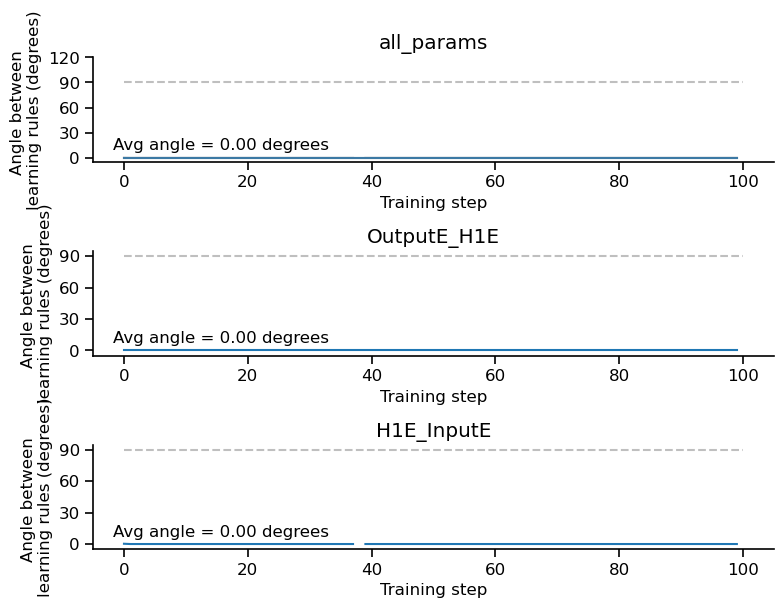

In [8]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bp, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## Simple FF almostBP1
- (should be 0 angle vs BP, if there are no somaI)
 - Weight transpose
 - E = dend act = b
 - Subtract forward act from dend

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl'


<Figure size 1000x300 with 0 Axes>

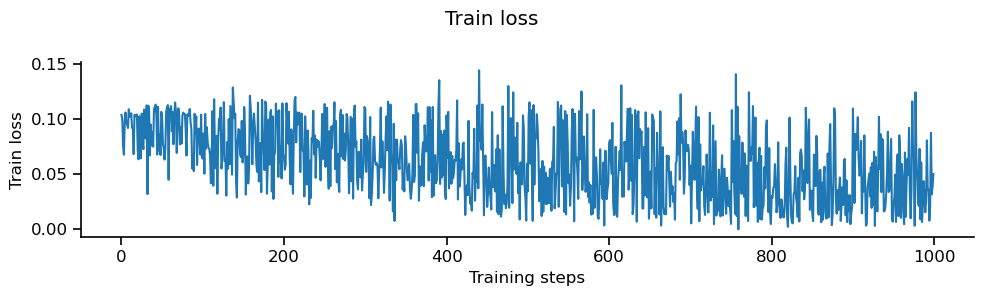

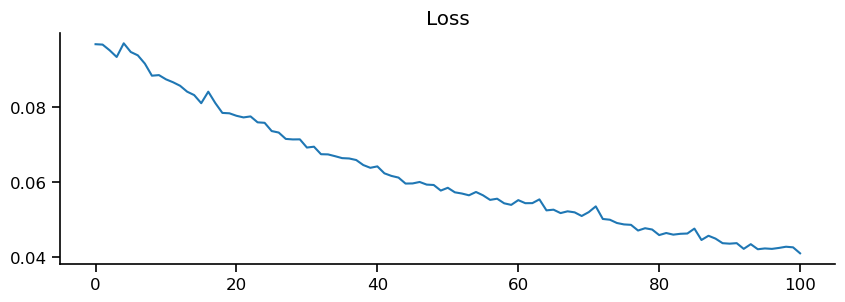

Batch accuracy = 80.30000305175781%


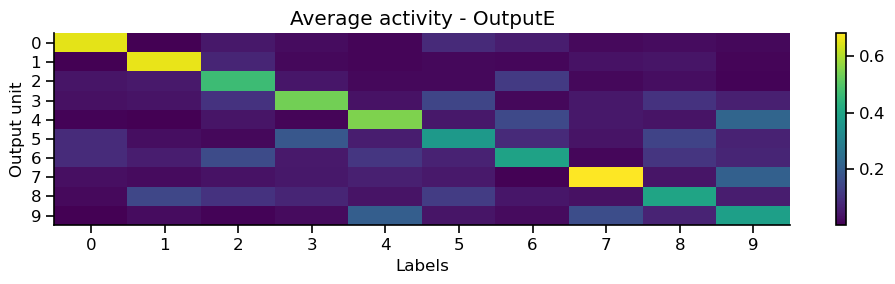

In [9]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP1_simpleFF"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP = ut.build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP.save(path=saved_network_path)

almostBP.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP)
plt.show()

plt.figure()
plt.plot(almostBP.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP, test_dataloader)

  0%|          | 0/100 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF_bpClone.pkl


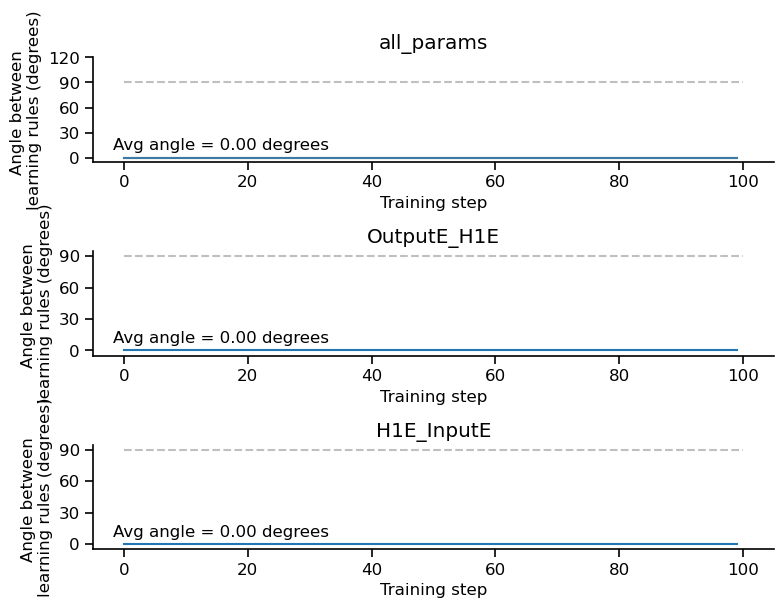

In [10]:
# # Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## almostBP2 (cloned dendI)
 - Weight transpose (FB)
 - Cloned dendI weights
 - E = dend act = b
 - Subtract forward act using dendI

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP2_simpleFF_dendI_cloned.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_almostBP2_simpleFF_dendI_cloned.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_almostBP2_simpleFF_dendI_cloned.pkl'


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:206: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x300 with 0 Axes>

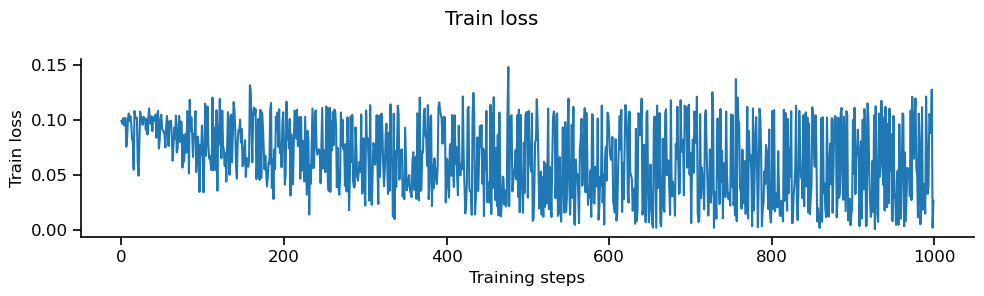

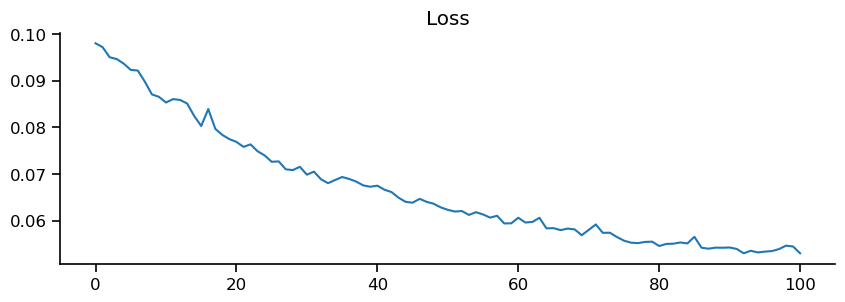

Batch accuracy = 64.63999938964844%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:641: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


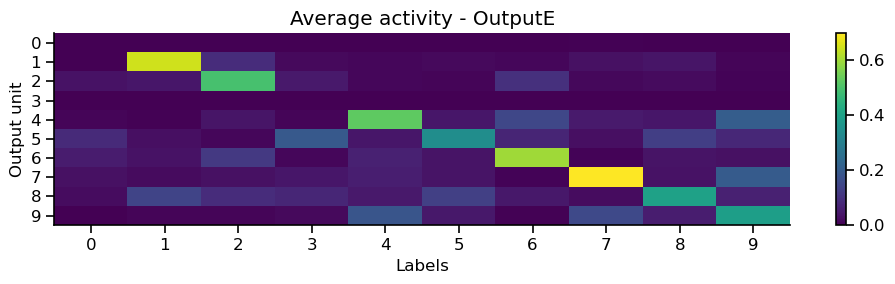

In [13]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP2_simpleFF_dendI_cloned"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP2 = ut.build_EIANN_from_config(config_path, network_seed=66049, projection_config_format='simplified')

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP2.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP2.save(path=saved_network_path)

almostBP2.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP2)
plt.show()

plt.figure()
plt.plot(almostBP2.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP2, test_dataloader)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP2_simpleFF_dendI_cloned_bpClone.pkl


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1428: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


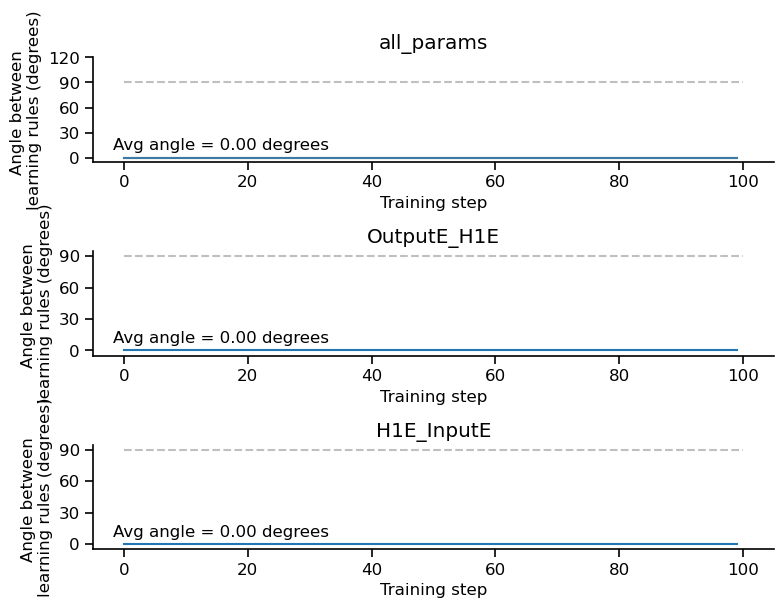

In [14]:
# # Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP2, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## almostBP with learned dendI

In [ ]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP1_simpleFF_dendI_learned"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP = ut.build_EIANN_from_config(config_path, network_seed=66049, projection_config_format='simplified')

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP.save(path=saved_network_path)

almostBP.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP)
plt.show()

plt.figure()
plt.plot(almostBP.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP, test_dataloader)

## BP Dale

- Should also be ~0 angle vs BP
    - Slight error due to weight rectification/clipping

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_bpDale.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_bpDale.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_bpDale.pkl'


<Figure size 1000x300 with 0 Axes>

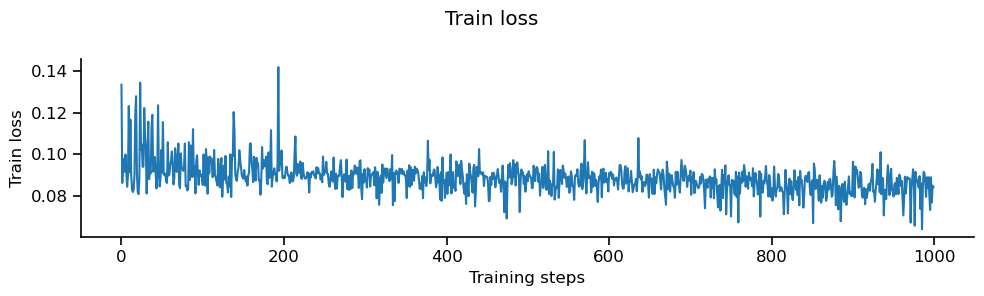

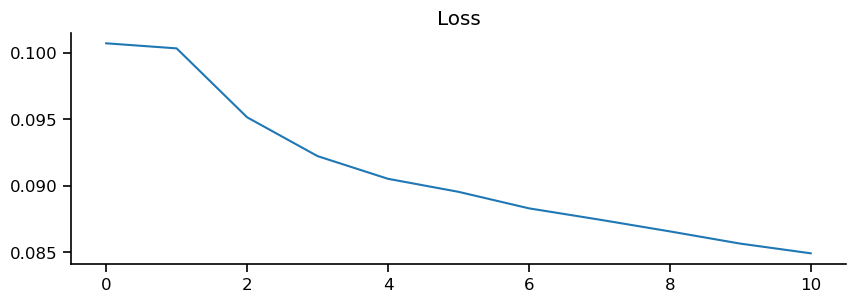

In [15]:
# Build network
network_name = "EIANN_1_hidden_mnist_bpDale"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bpDale = ut.build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
bpDale.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,100),
                store_history=True, 
                store_params=True,
                status_bar=True)
bpDale.save(path=saved_network_path)

bpDale.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(bpDale)
plt.show()

plt.figure()
plt.plot(bpDale.val_loss_history)
plt.title('Loss')
plt.show()

# pt.plot_batch_accuracy(bpDale, test_dataloader)

  0%|          | 0/10 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_bpDale_bpClone.pkl


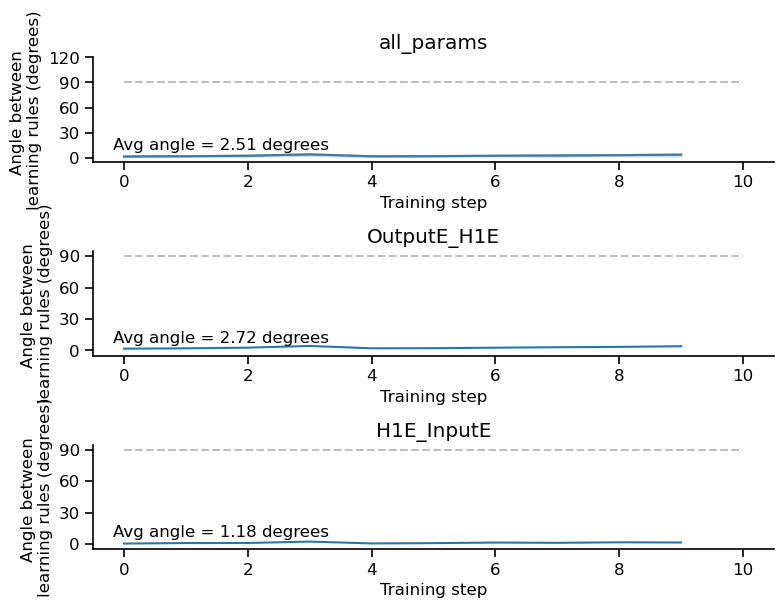

In [16]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bpDale, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)